In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='ticks', palette='Set2')
plt.rcParams['figure.figsize'] = 20, 16

In [2]:
data_url = "https://gist.githubusercontent.com/jattenberg/9f5174e365821dcdeda810c00d60830f/raw/ad8bff35b14ae9bbd6c72d5bb8c170b94b7b522f/country_stats.tsv"
country_data = pd.read_csv(data_url, sep="\t", index_col="country")

country_data.head(5)

,median age,land area (sq km),gdp per capita,life expectancy,military spending (% gdp),population,national savings (% gdp),unemployment rate
country,,,,,,,,
Afghanistan,18.8,652230.0,1900.0,51.7,0.89,34124811.0,22.7,35.0
Akrotiri,NaN,123.0,NaN,NaN,NaN,NaN,NaN,NaN
Albania,32.9,28748.0,12500.0,78.5,1.22,3047987.0,15.6,14.0
Algeria,28.1,2381741.0,15100.0,77.0,6.55,40969443.0,34.9,11.7
American Samoa,25.5,199.0,13000.0,73.4,NaN,51504.0,NaN,29.8


## Tree Map (Don't do this!)

In [ ]:
!sudo pip install squarify
import squarify

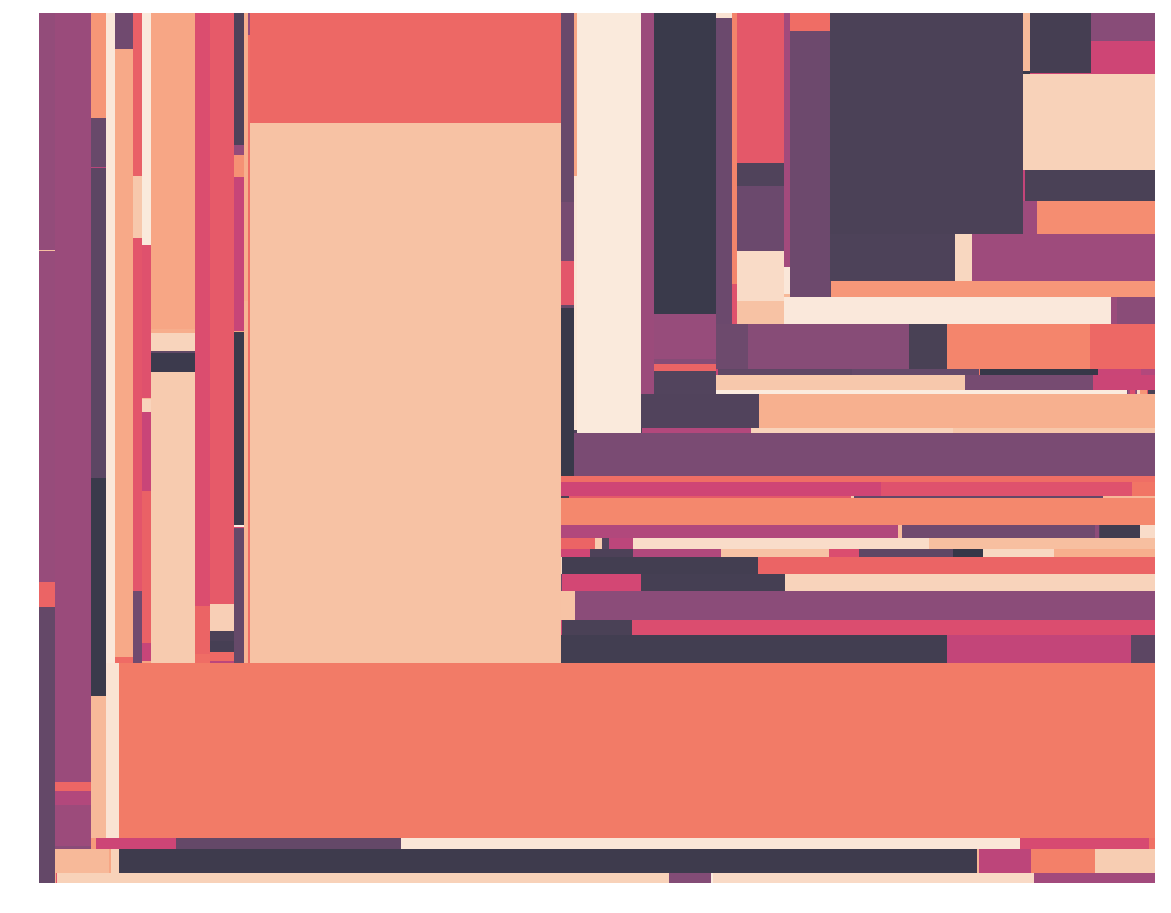

In [11]:
populations = country_data["population"].dropna()
squarify.plot(populations, alpha=0.8)
plt.axis('off')
plt.show()

### Too many entries! Let's just keep the top 20

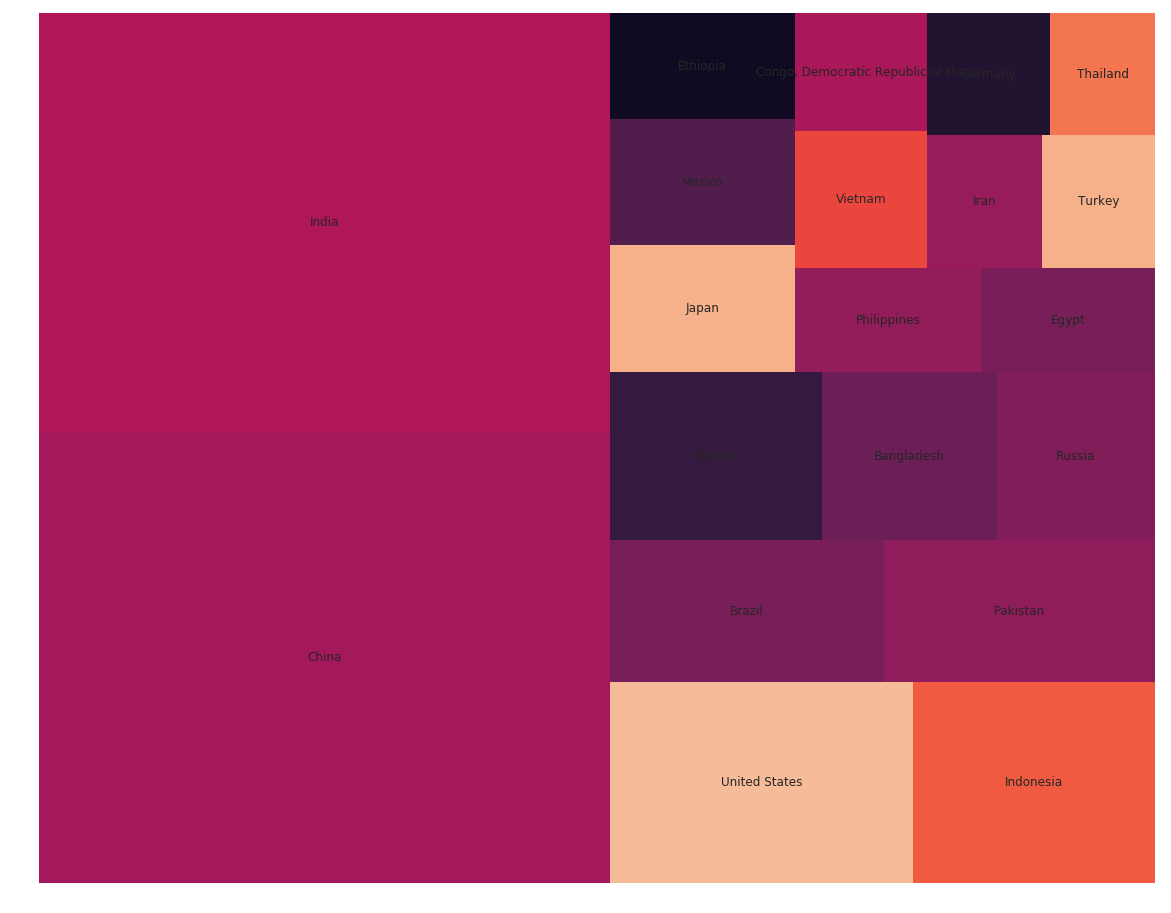

In [14]:
largest_pop = populations.nlargest(20)
squarify.plot(largest_pop, label=largest_pop.index)
plt.axis('off')
plt.show()

### Bangladesh or Russia? what is bigger? The Tree Map is difficult to read!
### Solution: Bar Chart

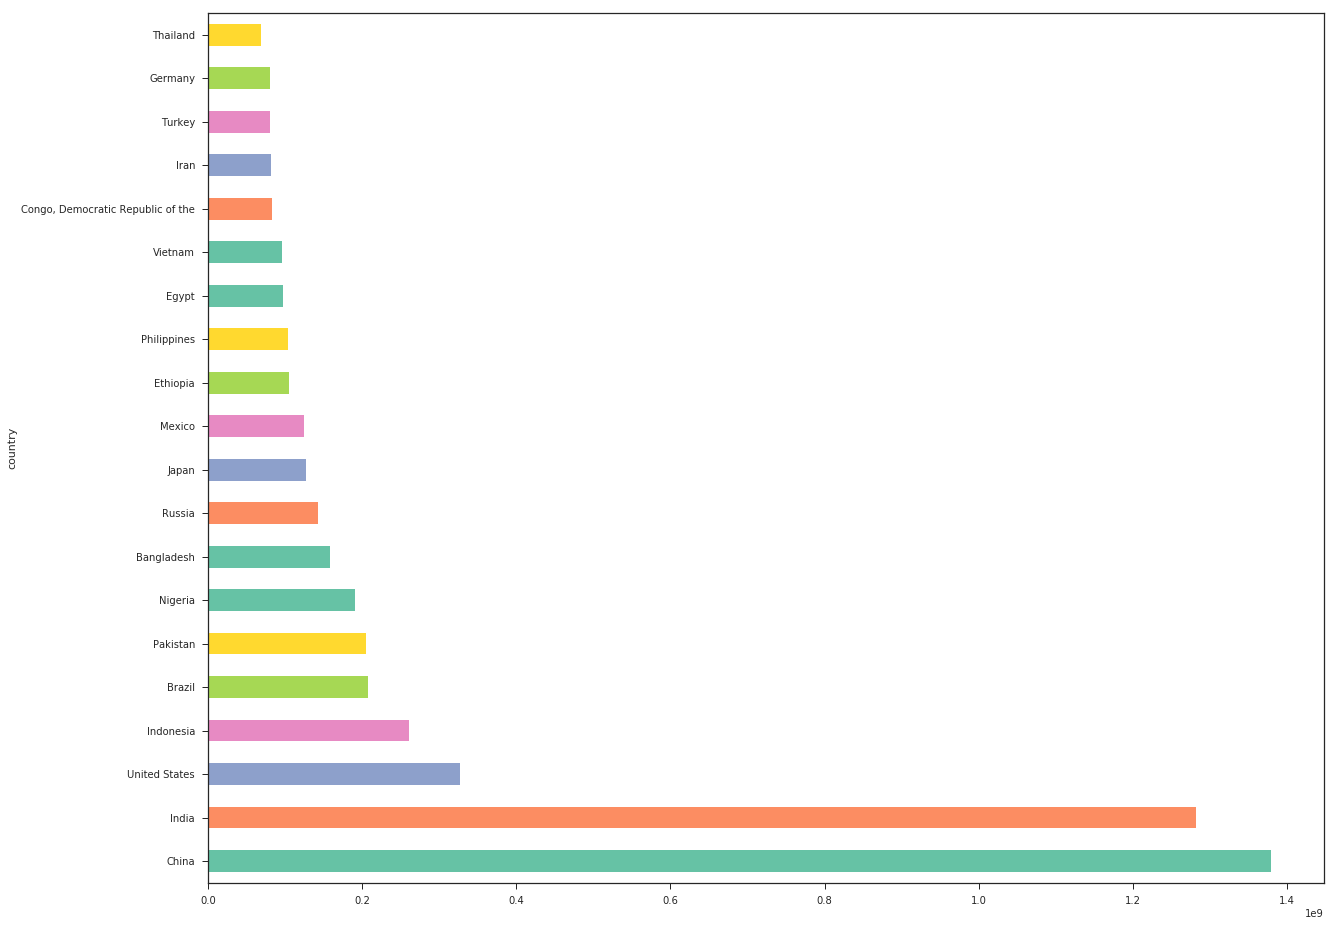

In [16]:
largest_pop.plot(kind="barh")
plt.show()

### How to make this descending?

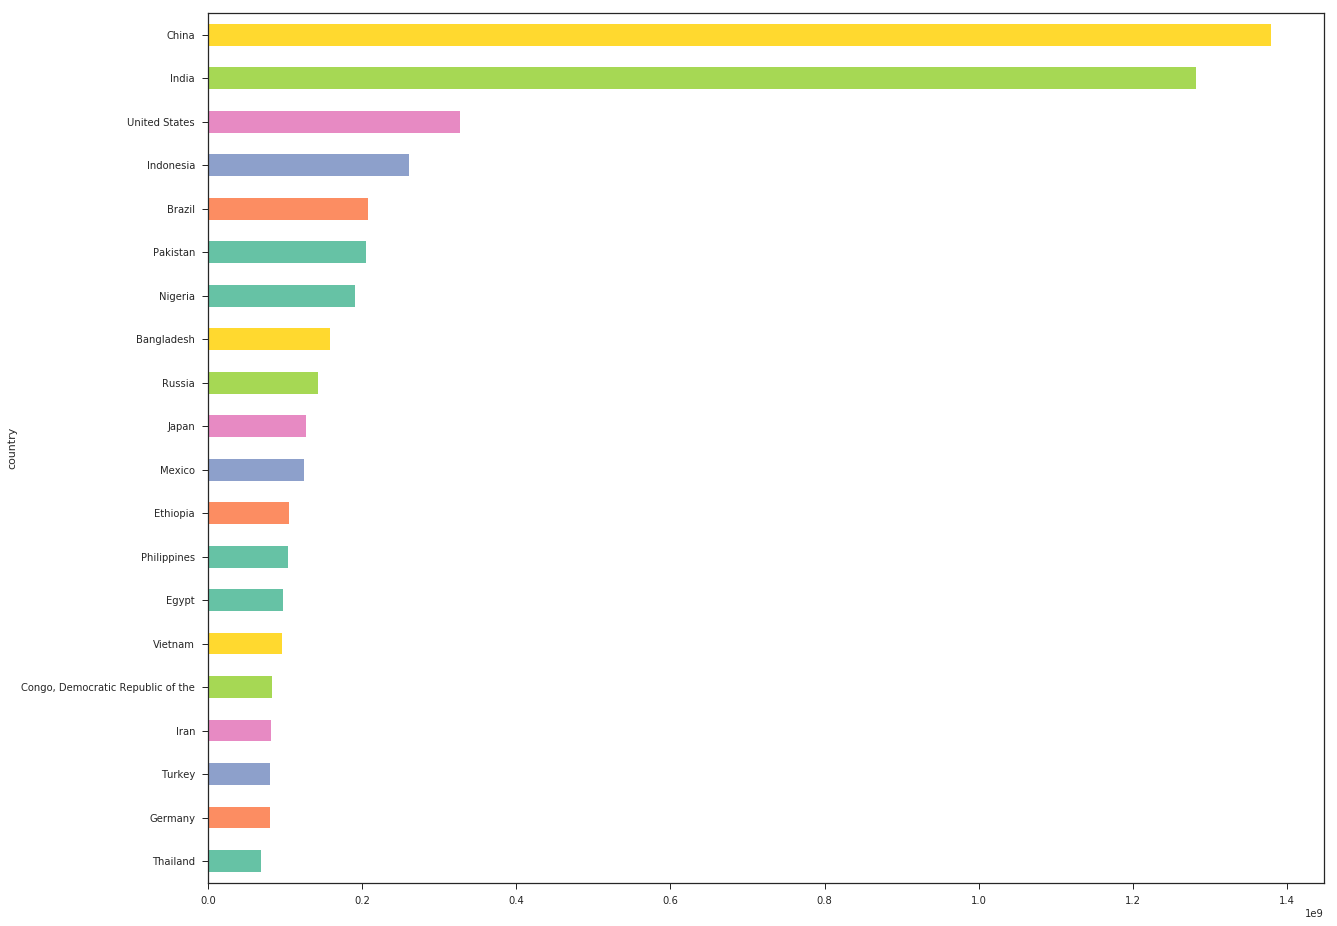

In [18]:
largest_pop.sort_values(ascending=True).plot(kind="barh")
plt.show()

What if we want a line with the median population?

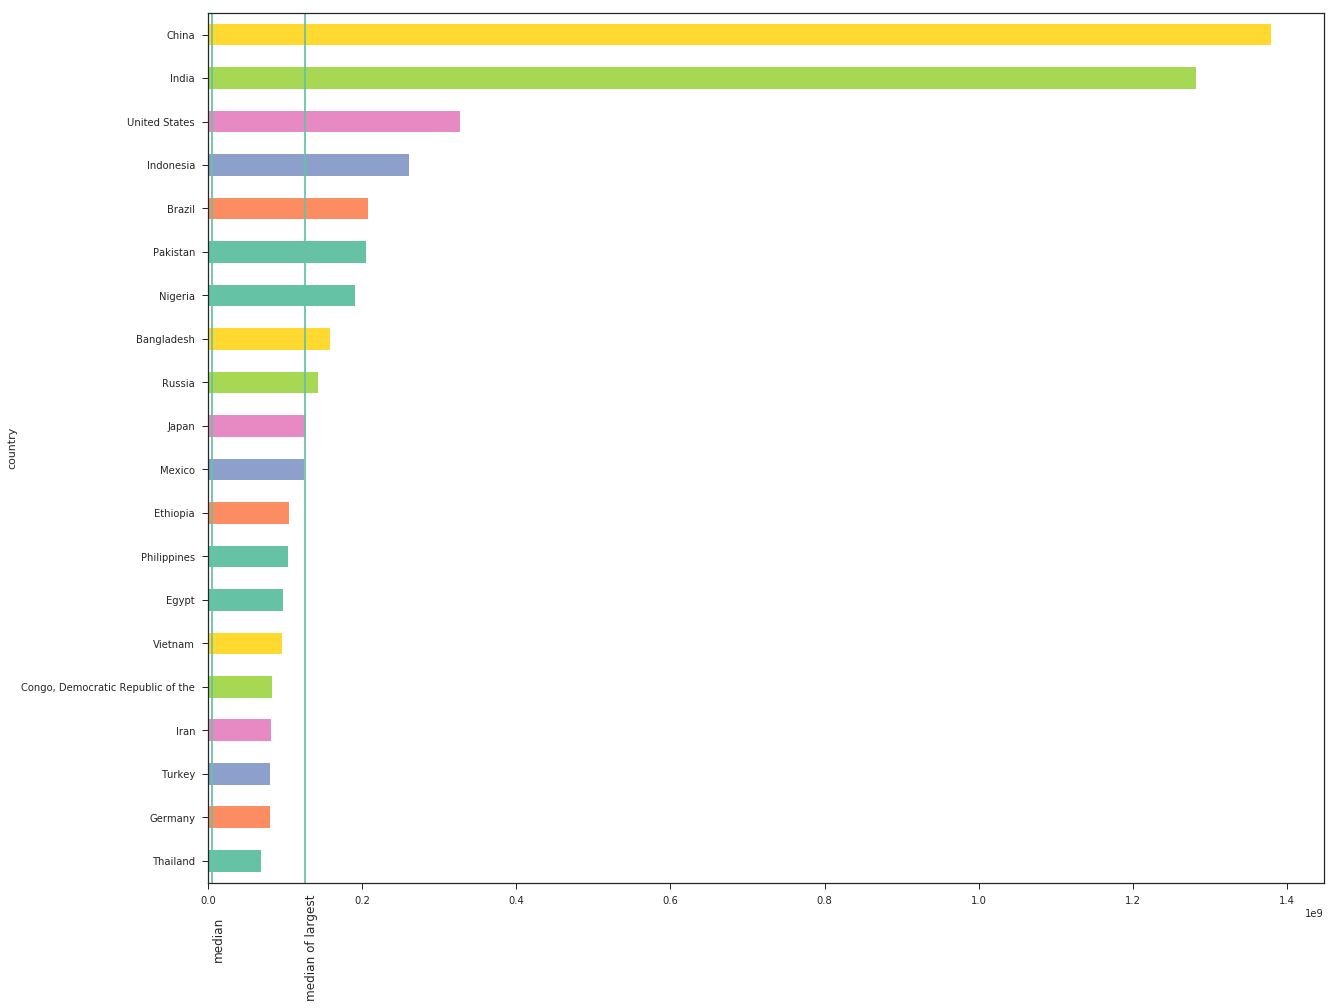

In [39]:
largest_pop.sort_values(ascending=True).plot(kind="barh")
median_overall = populations.median()
median_largest =  largest_pop.median()
plt.axvline(x=median_overall, label="median population")
plt.text(median_overall,-1.5,'median',rotation=90)
plt.axvline(x=median_largest, label="median of largest")
plt.text(median_largest,-1.0,'median of largest',rotation=90)
plt.show()

## Scatterplot

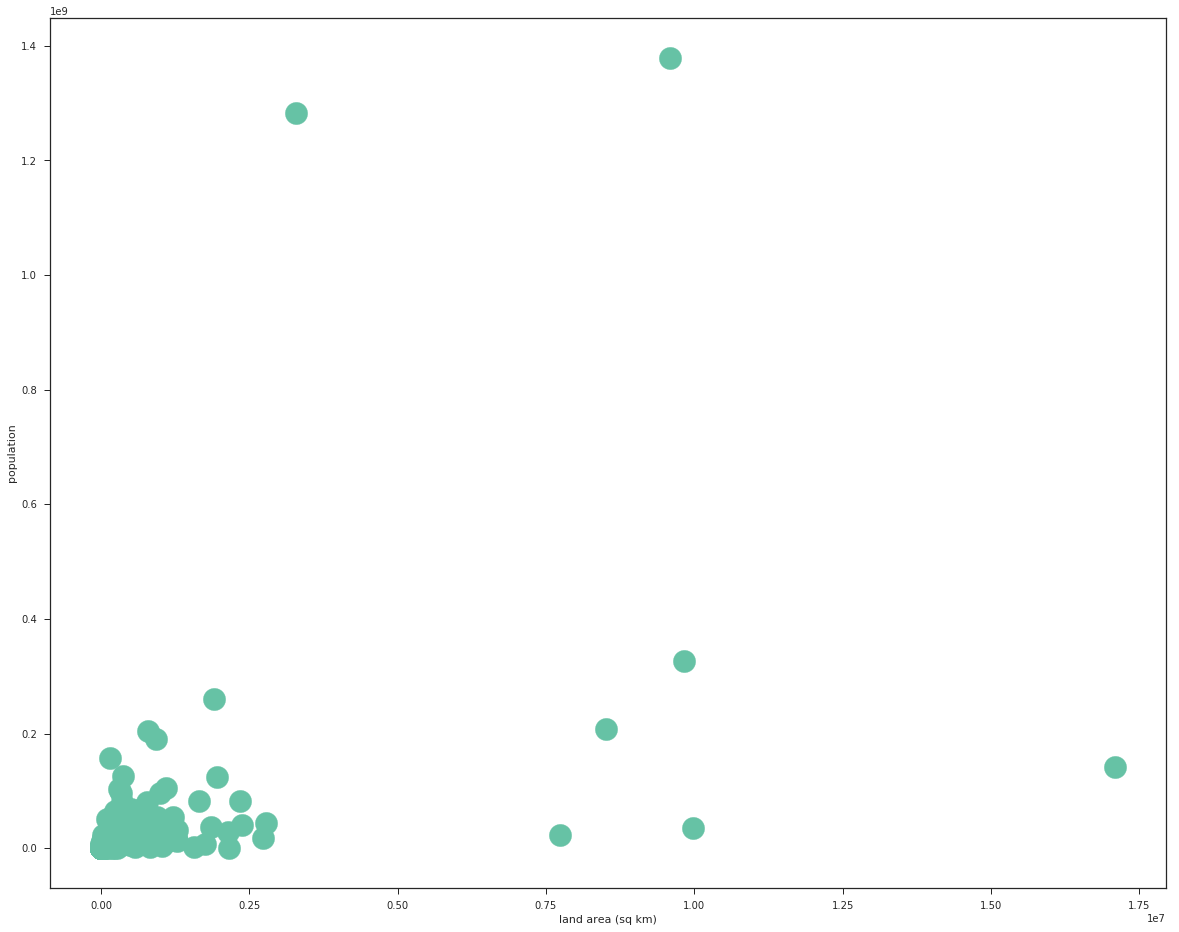

In [49]:
density = country_data[["land area (sq km)", "population"]].dropna()
density.plot(kind="scatter", x="land area (sq km)", y="population", s=500)
plt.show()

### What if we want to annotate the marks on our scatterplot? 

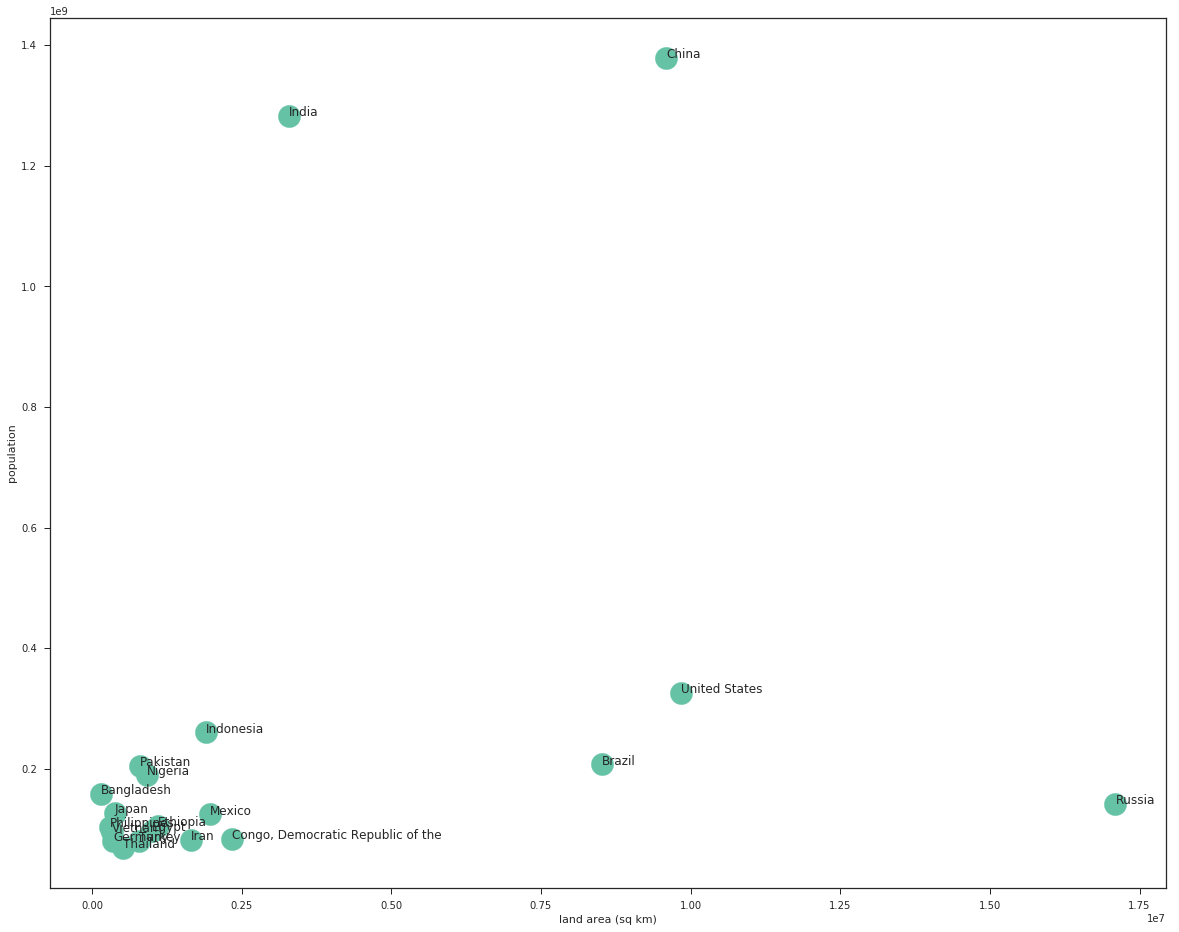

In [53]:
# just gives a handle to the figure and axes of our plot
fig, ax = plt.subplots()
largest_density = density.nlargest(20, columns="population")
largest_density.plot(kind="scatter", x="land area (sq km)", y="population", s=500, ax=ax)

for k,v in largest_density.iterrows():
    ax.annotate(k, v)
plt.show()

### Using the size and color of the mark to indicate additional info

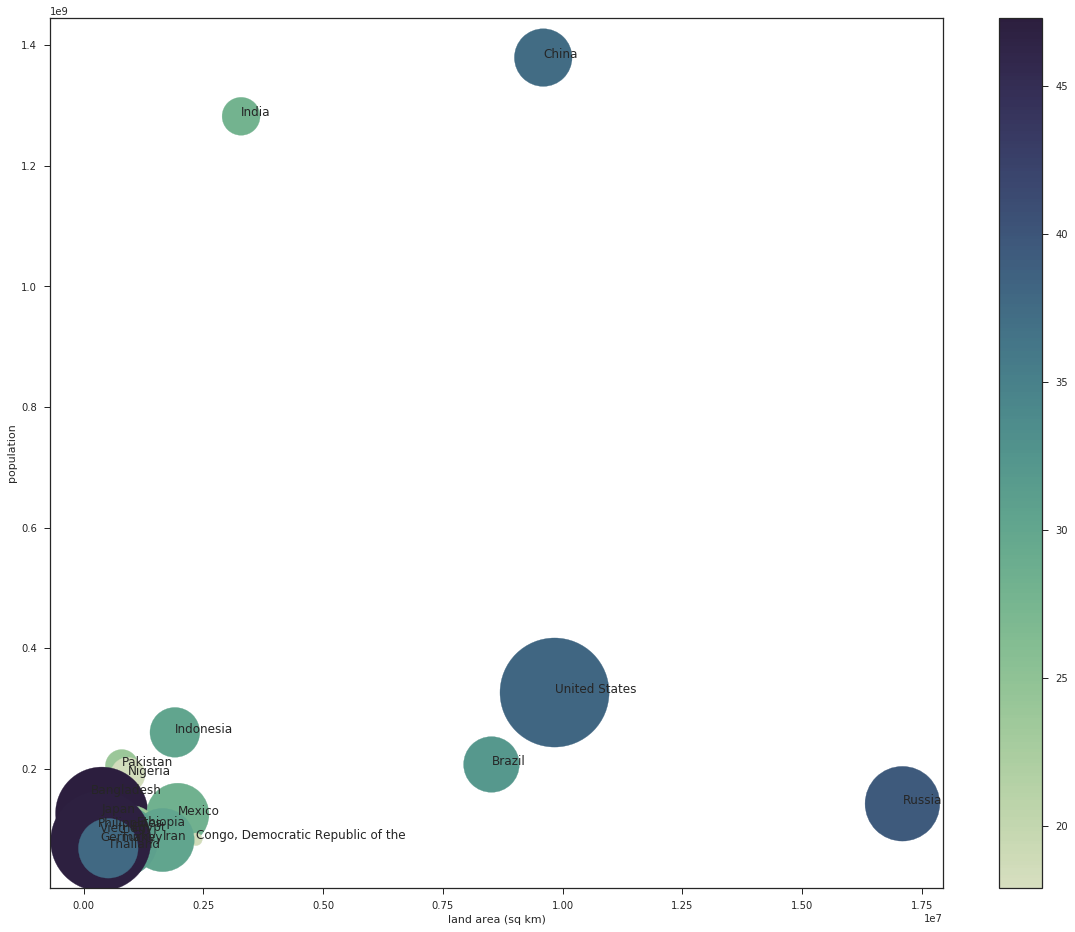

In [64]:
cmap = sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True)

fig, ax = plt.subplots()
other_info = country_data[["land area (sq km)", "population", "gdp per capita", "median age"]].dropna().nlargest(20, columns="population")
other_info.plot(kind="scatter",
                x="land area (sq km)",
                y="population",
                s=other_info["gdp per capita"]/5.0,
                c=other_info["median age"],
                ax=ax,
                cmap=cmap)


for k,v in other_info[["land area (sq km)", "population"]].iterrows():
    ax.annotate(k, v)

plt.show()

## Histograms

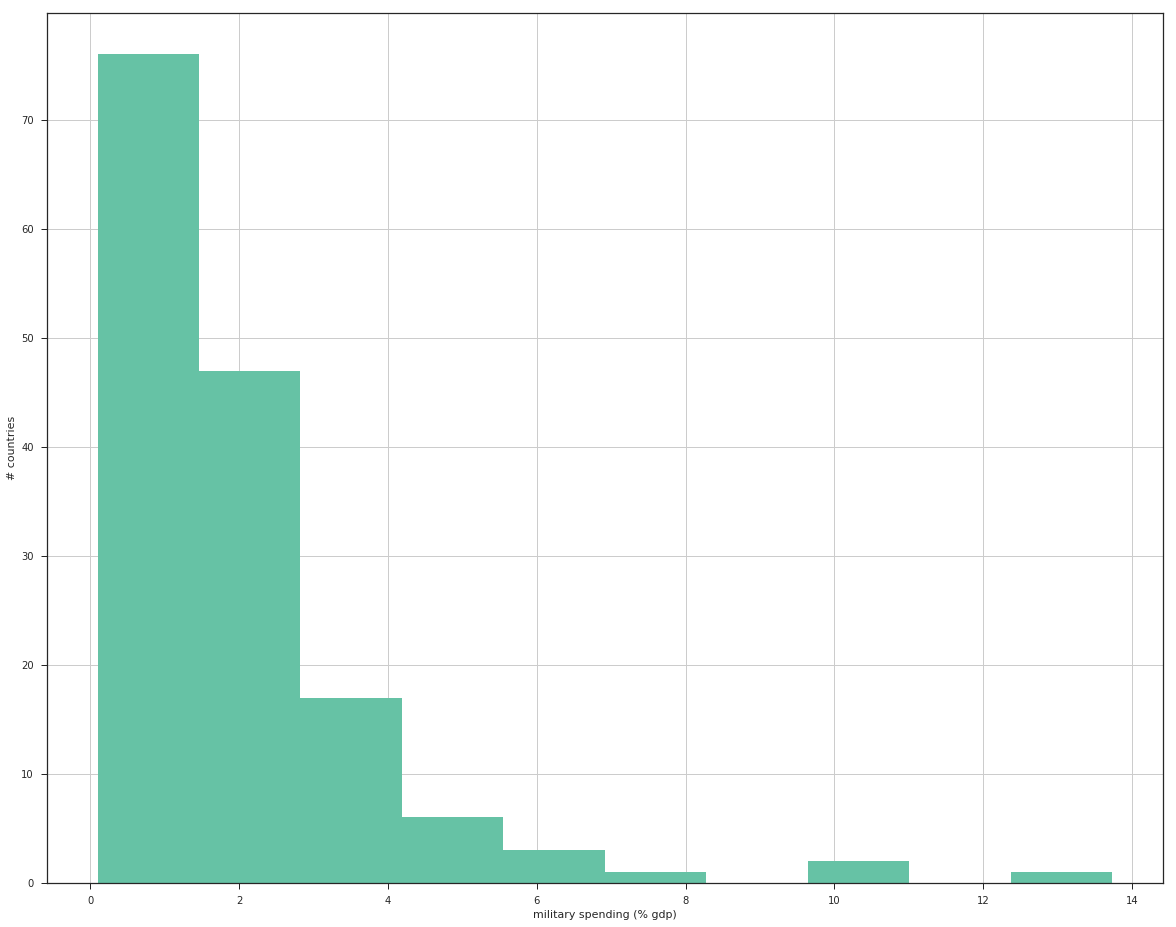

In [73]:
country_data["military spending (% gdp)"].dropna().hist()
plt.xlabel("military spending (% gdp)")
plt.ylabel("# countries")
plt.show()

## Joint Plot: Combining Histograms and Scatterplots

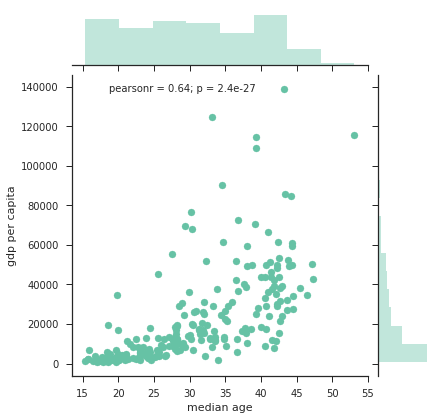

In [71]:
sns.jointplot("median age", "gdp per capita", country_data[["gdp per capita", "median age"]].dropna())
plt.show()

### we can also add a regression line!

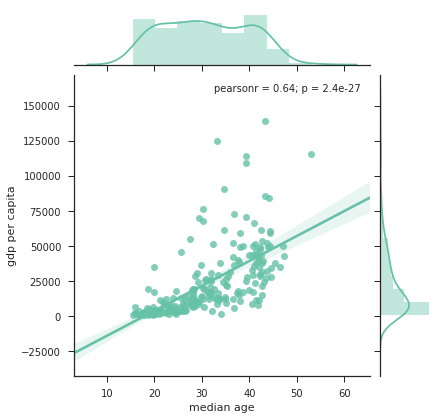

In [72]:
sns.jointplot("median age", "gdp per capita", country_data[["gdp per capita", "median age"]].dropna(), kind="reg")
plt.show()